# Lesson 4.2: Exploratory Data Analysis & Regular Expressions

### Lesson Duration: 3 hours

> Purpose: The purpose of this lesson is to dive deeper into the exploratory data analysis process for categorical variables, identify the data cleaning and data processing operations we would perform. We will also introduce some more advanced data cleaning operations including regular expressions.

### Setup

- All previous set up
- Use the same Jupyter notebook as used in 4.1

### Learning Objectives

After this lesson, students will be able to:

- Conduct exploratory data analysis to understand the nature of available data
- Identify data cleaning and data processing operations on **categorical** variables
- Bucket data, for example to convert a numerical column into a categorical one
- Explain how regular expressions work and what to use them for

---

### Lesson 1 key concepts

> :clock10: 20 min

Conduct exploratory data analysis (`EDA`) - 1

- Analyze categorical variables
- Identify the changes to be made


Code Sample: 

Note this is a way to check the categorical variables (`dtypes` as object). If we want to perform any filtering operation, we will take the complete dataset and not just the categorical columns.

In [4]:
#importing libraries
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

In [5]:
data = pd.read_csv('./files_for_lesson_and_activities/unit4.csv') # this file is in files_for_lesson_and_activities folder

In [6]:
categoricals = data.select_dtypes(np.object)
categoricals.head()

,STATE,PVASTATE,MDMAUD,RECP3,GENDER,DOMAIN,HOMEOWNR,VETERANS,RFA_2
0,IL,NaN,XXXX,NaN,F,T2,NaN,NaN,L4E
1,CA,NaN,XXXX,NaN,M,S1,H,NaN,L2G
2,NC,NaN,XXXX,NaN,M,R2,U,NaN,L4E
3,CA,NaN,XXXX,NaN,F,R2,U,NaN,L4E
4,FL,NaN,XXXX,X,F,S2,H,NaN,L2F


In [12]:
data.shape

(90569, 29)

In [9]:
# Deleting columns with over 80% empty values

print(data['PVASTATE'].value_counts())

P    1380
E       5
Name: PVASTATE, dtype: int64


In [10]:
print(data['RECP3'].value_counts())

X    1833
Name: RECP3, dtype: int64


In [11]:
print(data['VETERANS'].value_counts())

Y    9846
Name: VETERANS, dtype: int64


In [13]:
data = data.drop(columns=['PVASTATE', 'RECP3', 'VETERANS'], axis=1)

In [14]:
data['HOMEOWNR'].value_counts()

H    49646
U    19872
Name: HOMEOWNR, dtype: int64

As you can see, there is a lot of `null` values in the column but it is still not as many that the column might be removed. And if we filter out those values we will lose a lot of data. Another way of replacing those empty values is by replacing them with the maximum represented category but this introduces a bias.
Another advanced methods include using machine learning to predict those values. Here in this case we will delete this column instead of inducing a bias.

In [15]:
data = data.drop(columns=['HOMEOWNR'], axis=1)

### Lesson 2 key concepts

> :clock10: 20 min

Cleaning categorical variables

- Using the `map` function to work on categories of a column
- Comparing categorical features with `Y` using box plot
- Impute missing values

Code Sample:  

In [16]:
# Cleaning column GENDER

data['GENDER'].value_counts()

F    48668
M    37132
U     1635
J      336
C        2
A        1
Name: GENDER, dtype: int64

In [17]:
def clean_gender_col(x):
    if x in ['',' ' ,'U', 'C', 'J', 'A']:
        return 'other'
    else:
        return x

In [18]:
data['GENDER'] = list(map(clean_gender_col, data['GENDER']))

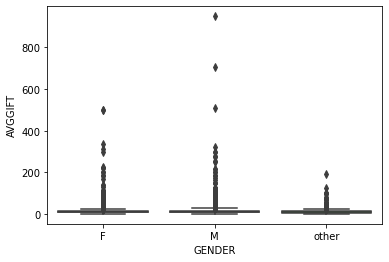

In [19]:
# Visually analyzing categorical data with Target variable
sns.boxplot(x="GENDER", y="AVGGIFT", data=data)
plt.show()

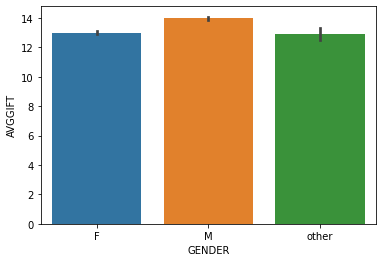

In [20]:
sns.barplot(x="GENDER", y="AVGGIFT", data=data)
plt.show()

- Looking at the box plot, we can see that there is not a lot of variation in Y with different categories, we can delete the column gender

In [21]:
data = data.drop(columns=['GENDER'], axis=1)

# 4.02 Activity 2

```python
# Cleaning column GENDER
# this is presented in the previous example on the class

data['GENDER'].value_counts()
def clean_gender_col(x):
    if x in ['',' ' ,'U', 'C', 'J', 'A']:
        return 'other'
    else:
        return x

data['GENDER'] = list(map(clean_gender_col, data['GENDER']))
```

<br>

There is a more efficient way to use `map` over pandas dataframes, and it is called [apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html).

- Use it instead of the `map` for applying the previous function to the same data.
- Do the same using the equivalent lambda function.

### Lesson 3 key concepts

> :clock10: 20 min

- Dealing with a large number of categories in a column
- Grouping data/bucketing data

Code Sample: Dealing with a large number of categories

This code gives us the names of the states that should be put into category `Other`:

In [23]:
vals = pd.DataFrame(data['STATE'].value_counts())

In [24]:
vals = vals.reset_index()

In [25]:
vals.columns = ['state', 'counts']

In [26]:
group_states_df = vals[vals['counts']<2500]

In [27]:
group_states = list(group_states_df['state'])

In [28]:
group_states

['TN',
 'AZ',
 'MN',
 'OR',
 'CO',
 'SC',
 'AL',
 'OK',
 'KY',
 'LA',
 'KS',
 'IA',
 'AR',
 'MS',
 'NV',
 'NM',
 'NE',
 'UT',
 'ID',
 'MT',
 'HI',
 'SD',
 'AK',
 'WY',
 'ND',
 'AP',
 'NY',
 'VA',
 'OH',
 'PA',
 'MD',
 'MA',
 'NJ',
 'CT',
 'AA',
 'AE',
 'ME',
 'NH',
 'VT',
 'RI',
 'VI',
 'WV',
 'GU',
 'DE',
 'AS',
 'DC']

In [29]:
def clean_state(x):
    if x in group_states:
        return 'other'
    else:
        return x

In [30]:
data['STATE'] = list(map(clean_state, data['STATE']))

In [32]:
data['STATE'].head()

0    IL
1    CA
2    NC
3    CA
4    FL
Name: STATE, dtype: object

**Code Sample: Grouping data/bucketing data**

In [33]:
# Creating buckets/groups of data

ic2_labels = ['Low', 'Moderate', 'High', 'Very High']

In [35]:
data['ic2_'] = pd.cut(data['IC2'],4, labels=ic2_labels)

In [36]:
data # or: data['ic2_']

,Unnamed: 0,STATE,DOB,MDMAUD,DOMAIN,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT,ic2_
0,0,IL,3712,XXXX,T2,NaN,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,L4E,31,4.0,7.741935,Low
1,1,CA,5202,XXXX,S1,6.0,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,L2G,3,18.0,15.666667,High
2,2,NC,0,XXXX,R2,3.0,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,L4E,27,12.0,7.481481,Low
3,3,CA,2801,XXXX,R2,1.0,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,L4E,16,9.0,6.812500,Moderate
4,4,FL,2001,XXXX,S2,3.0,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,L2F,37,14.0,6.864865,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90564,90564,FL,4803,XXXX,S2,6.0,733,875,4,3,285,288,333,334,11390,59,23,5,12,9702,L4D,24,3.0,3.375000,Low
90565,90565,other,0,XXXX,C2,NaN,988,1025,6,6,433,481,499,535,18807,14,6,5,12,9702,L1G,1,NaN,25.000000,Moderate
90566,90566,TX,5001,XXXX,C1,7.0,1679,1723,3,3,806,836,802,849,26538,10,4,3,8,9702,L1F,1,NaN,20.000000,High
90567,90567,MI,3801,XXXX,C3,NaN,376,377,4,3,263,264,319,345,12178,33,14,7,17,9702,L3E,7,3.0,8.285714,Low


In [37]:
# There is also pd.qcut which is based on quantiles.

pd.cut(data['IC2'],4)     # to check the bins

0          (-1.5, 375.0]
1        (750.0, 1125.0]
2          (-1.5, 375.0]
3         (375.0, 750.0]
4          (-1.5, 375.0]
              ...       
90564      (-1.5, 375.0]
90565     (375.0, 750.0]
90566    (750.0, 1125.0]
90567      (-1.5, 375.0]
90568     (375.0, 750.0]
Name: IC2, Length: 90569, dtype: category
Categories (4, interval[float64]): [(-1.5, 375.0] < (375.0, 750.0] < (750.0, 1125.0] < (1125.0, 1500.0]]

# 4.02 Activity 3

Use the column `MDMAUD` to reduce the number of categories to two (`XXXX` and other).

### Lesson 4 key concepts

> :clock10: 20 min

Introduction to regular expressions

Code Sample: Simple Regex

In [38]:
import re

In [39]:
text = "That person wears marvelous trousers."

In [40]:
pattern = '[A-z]'
# pattern = 'That'
# pattern = '[That]'
# pattern = '[atsdhksdgs]'

In [41]:
re.findall(pattern, text)

['T',
 'h',
 'a',
 't',
 'p',
 'e',
 'r',
 's',
 'o',
 'n',
 'w',
 'e',
 'a',
 'r',
 's',
 'm',
 'a',
 'r',
 'v',
 'e',
 'l',
 'o',
 'u',
 's',
 't',
 'r',
 'o',
 'u',
 's',
 'e',
 'r',
 's']

In [42]:
text = "This is an A and B conversation, so C your way out of it."
pattern = '[^A-z]'
re.findall(pattern, text)

[' ', ' ', ' ', ' ', ' ', ' ', ',', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '.']

Code Sample: Quantifiers

- `*`: Matches previous character 0 or more times
- `+`: Matches previous character 1 or more times
- `?`: Matches previous character 0 or 1 times (optional)
- `{}`: Matches previous characters however many times specified within:
- `{n}`: Exactly n times
- `{n,}`: At least n times
- `{n,m}`: Between n and m times

In [43]:
text = "The complicit caat interacted with the other cats exactly as we expected."
pattern = "c*t"
print(re.findall(pattern, text))

['t', 't', 't', 'ct', 't', 't', 't', 't', 'ct', 'ct']


In [44]:
text = "The complicit caat interacted with the other cats exactly as we expected."
pattern = 'c*a*t'
print(re.findall(pattern, text))

['t', 'caat', 't', 'ct', 't', 't', 't', 'cat', 'ct', 'ct']


In [45]:
text = "The complicit caaaat ct interacted with the other cats exactly as we expected."
pattern = "a+"
print(re.findall(pattern, text))
# Returns matches where the previous character appears 1 or more times

['aaaa', 'a', 'a', 'a', 'a']


In [46]:
text = "Is the correct spelling color or colour?"
pattern = "colou?r"
print(re.findall(pattern, text))

['color', 'colour']


In [47]:
text = "We can match the following: aaaawwww, aww, awww, awwww, awwwww"
pattern = "aw{3}"
print(re.findall(pattern, text))

['awww', 'awww', 'awww', 'awww']


In [49]:
text = "Let's see how we can match the following: aaw, aaww, aawww, awwww, awwwww"
pattern = "aw{1,}"
print(re.findall(pattern, text))

['aw', 'aww', 'awww', 'awwww', 'awwwww']


In [50]:
pattern = "a{2,}w{2,}"
print(re.findall(pattern, text))

['aaww', 'aawww']


# 4.02 Activity 4

Create a function to automate the process of reducing the number of values of a categorical column.

# Lab | Cleaning categorical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in `files_for_lab` folder. In this lab we will explore categorical data. You can also continue working on the same jupyter notebook from the previous lab. However that is not necessary.

### Instructions

1. Import the necessary libraries if you are starting a new notebook.
2. Load the csv. Use the variable `customer_df` as `customer_df = pd.read_csv()`.
3. What should we do with the `customer_id` column?
4. Load the continuous and discrete variables into `numericals_df` and `categorical_df` variables, for eg.: 
    ```py
    numerical_df = customer_df.select_dtypes()
    categorical_df = customer_df.select_dtypes()
    ```
5. Plot every categorical variable. What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis
6. For the categorical data, check if there is any data cleaning that need to perform. 
**Hint**: You can use the function `value_counts()` on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.

### LAB Solution:

1. Import the necessary libraries if you are starting a new notebook.
  ```py
  # Base libraries
  import pandas as pd
  import numpy as np
  
  pd.set_option('display.max_columns', None)
  
  # Visualization
  import matplotlib.pyplot as plt
  import seaborn as sns
  
  %matplotlib inline
  ```

2. Load the csv. Use the variable `customer_df` as `customer_df = pd.read_csv()`

3. What should we do with the `customer_id` column?
    We should delete it as it is only a unique identifier for each row in the data. You can relate this to the primary key in a table in SQL

4. Load the continuous and discrete variables into `numericals_df` and `categorical_df` variables, for eg. 
  ```py
  numerical_df = customer_df.select_dtypes()
  categorical_df = customer_df.select_dtypes()
  ```

  ```
  numerical_df = customer_df.select_dtypes(np.number)
  categorical_df = customer_df.select_dtypes(np.object)
  ```


5. Plot every categorical variable. What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis
  ```py
  for col in categoricals.columns:
      sns.barplot(x = col, y = 'total_claim_amount', data = customer_df)
      plt.show()
  ```
6. For the categorical data, check if there is any data cleaning that need to perform. **Hint**: You can use the function `value_counts()` on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.
  ```py
  for col in categoricals.columns:
      print(categoricals[col].value_counts())
  ```
  ```
  The result would look like this :
  California    3150
  Oregon        2601
  Arizona       1703
  Nevada         882
  Washington     798
  Name: state, dtype: int64
  No     7826
  Yes    1308
  Name: response, dtype: int64
  Basic       5568
  Extended    2742
  Premium      824
  Name: coverage, dtype: int64
  Bachelor                2748
  College                 2681
  High School or Below    2622
  Master                   741
  Doctor                   342
  Name: education, dtype: int64
  ```
---

Note that: 
1. If there is an under-representation of one or some of the unique categories in a column, either they can be removed or they can be grouped together into one category. This is really useful when we encode the categorical data later in the process
2. This can also be used to check if there are any typos in the data for eg if, in the state column, there are instances like california, Cali, CALIFORNIA, etc, then we can perform some cleaning there 